Enter Youtube URL

In [9]:
# Input the URL of the YouTube playlist you want to download
url = "https://youtube.com/playlist?list=PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW"

Download Mp3 File

In [2]:
import yt_dlp
from mutagen.id3 import ID3, APIC
import os

# Define the options for downloading
ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': '%(title)s.%(ext)s',
    'ffmpeg_path': 'C:/ffmpeg/bin/ffmpeg.exe',
    'ffprobe_path': 'C:/ffmpeg/bin/ffprobe.exe',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '320'
    },
    {
        'key': 'FFmpegMetadata', # Include bitrate metadata
    }]
}

# Download the video and convert it to mp3
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([url]) 

[youtube:tab] Extracting URL: https://youtube.com/playlist?list=PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW
[youtube:tab] PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW: Downloading webpage
[youtube:tab] PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW: Redownloading playlist API JSON with unavailable videos
[download] Downloading playlist: test
[youtube:tab] Playlist test: Downloading 2 items of 2
[download] Downloading item 1 of 2
[youtube] Extracting URL: https://www.youtube.com/watch?v=csL0vOd7tWo
[youtube] csL0vOd7tWo: Downloading webpage
[youtube] csL0vOd7tWo: Downloading android player API JSON
[info] csL0vOd7tWo: Downloading 1 format(s): 251
[download] Destination: Style Amro Piti Improvisation (Official Music Video).webm
[download] 100% of    3.50MiB in 00:00:01 at 2.47MiB/s   
[ExtractAudio] Destination: Style Amro Piti Improvisation (Official Music Video).mp3
Deleting original file Style Amro Piti Improvisation (Official Music Video).webm (pass -k to keep)
[Metadata] Adding metadata to "Style Amro Piti Improv

In [10]:
import yt_dlp
from mutagen.id3 import ID3, APIC

# Define the options for downloading the thumbnail
ydl_opts_thumb = {
    'ffmpeg_path': 'C:/ffmpeg/bin/ffmpeg.exe',
    'ffprobe_path': 'C:/ffmpeg/bin/ffprobe.exe'
}

# Create a YoutubeDL object and extract the video information
with yt_dlp.YoutubeDL(ydl_opts_thumb) as ydl_thumb:
    info_dict = ydl_thumb.extract_info(url, download=False)

[youtube:tab] Extracting URL: https://youtube.com/playlist?list=PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW
[youtube:tab] PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW: Downloading webpage
[youtube:tab] PLyGJ6xqJj7L9G3ep1hAcfgAXgz9j0dJHW: Redownloading playlist API JSON with unavailable videos
[download] Downloading playlist: test
[youtube:tab] Playlist test: Downloading 2 items of 2
[download] Downloading item 1 of 2
[youtube] Extracting URL: https://www.youtube.com/watch?v=csL0vOd7tWo
[youtube] csL0vOd7tWo: Downloading webpage
[youtube] csL0vOd7tWo: Downloading android player API JSON
[download] Downloading item 2 of 2
[youtube] Extracting URL: https://www.youtube.com/watch?v=1vkspazPRps
[youtube] 1vkspazPRps: Downloading webpage
[youtube] 1vkspazPRps: Downloading android player API JSON
[download] Finished downloading playlist: test


In [3]:
import os

# Download the playlist thumbnails
for entry in info_dict['entries']:
    # Download the video thumbnail
    thumbnail_url = entry['thumbnail']
    with yt_dlp.YoutubeDL(ydl_opts_thumb) as ydl_thumb:
            ydl_thumb.download(thumbnail_url)

[generic] Extracting URL: https://i.ytimg.com/vi/csL0vOd7tWo/maxresdefault.jpg
[generic] maxresdefault: Downloading webpage


[info] maxresdefault: Downloading 1 format(s): 0
[download] Destination: maxresdefault [maxresdefault].jpg
[download] 100% of   28.07KiB in 00:00:00 at 139.75KiB/s   
[generic] Extracting URL: https://i.ytimg.com/vi_webp/1vkspazPRps/maxresdefault.webp
[generic] maxresdefault: Downloading webpage


[info] maxresdefault: Downloading 1 format(s): 0
[download] Destination: maxresdefault [maxresdefault].webp
[download] 100% of  178.66KiB in 00:00:00 at 592.93KiB/s 


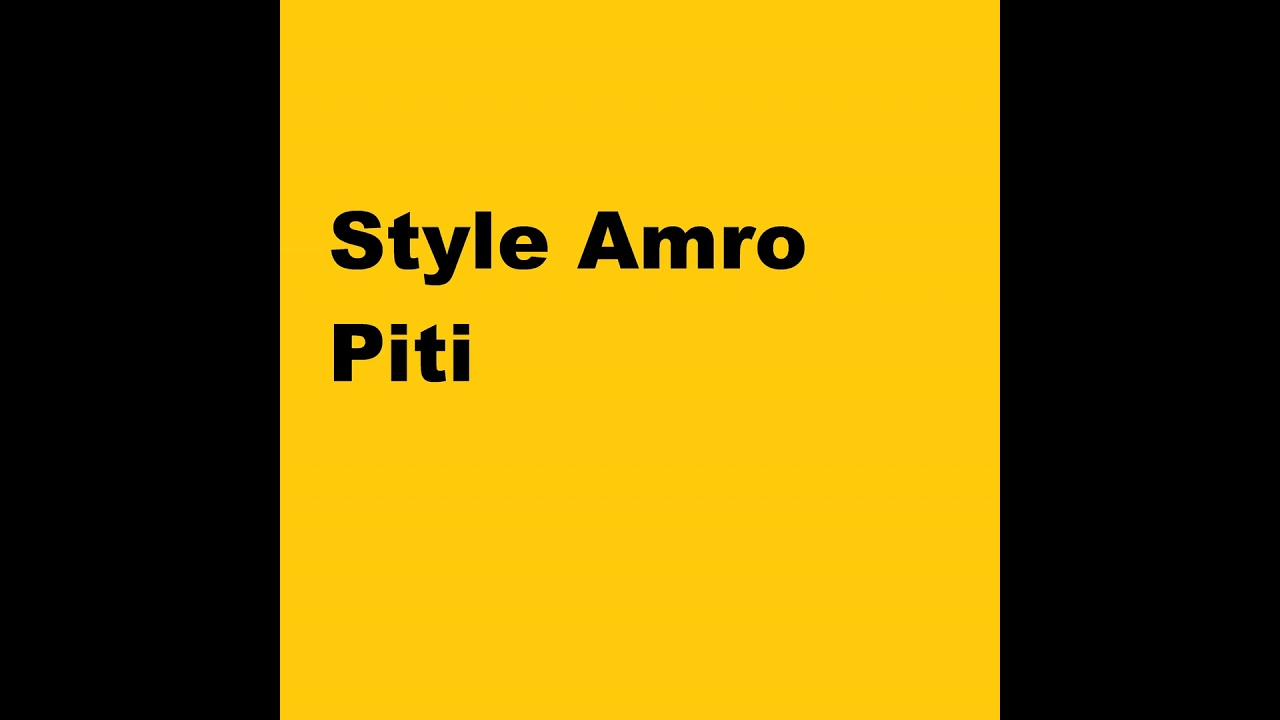

In [26]:
img

In [15]:
import glob

file_list = glob.glob('max*') # find all files starting with "test"
if file_list: # check if any files were found
    first_file = file_list[0] # get the name of the first file

first_file

'maxresdefault [maxresdefault].jpg'

In [17]:
# Embed the thumbnail in the generated mp3 file
audio_file = "DON BIGG - ٤in (Album Trailer).mp3"
audio = ID3(audio_file)
with open("DON BIGG - ٤in (Album Trailer).jpg", 'rb') as f:
    audio.add(APIC(mime='image/jpeg', type=3, desc=u'Cover', data=f.read()))
audio.save()

In [21]:
file_list = glob.glob('maxresdefault*') # find all files starting with thumbnail_filename
if file_list: # check if any files were found
    print("1")
    first_file = file_list[0] # get the name of the first file

1


In [22]:
first_file

'maxresdefault [maxresdefault].jpg'

In [29]:
import os
from PIL import Image
import glob

# Download the playlist thumbnails
for entry in info_dict['entries']:
    # Download the video thumbnail
    thumbnail_url = entry['thumbnail']
    with yt_dlp.YoutubeDL(ydl_opts_thumb) as ydl_thumb:
            ydl_thumb.download(thumbnail_url)

            thumbnail_filename = entry['title']
            file_list = glob.glob('maxresdefault*') # find all files starting with thumbnail_filename
            if file_list: # check if any files were found
                first_file = file_list[0] # get the name of the first file
            
            # Load the original thumbnail
            img = Image.open(first_file)

            if os.path.splitext(first_file)[1] != '.jpg':
                # Save the thumbnail in JPEG format
                img.save(os.path.splitext(first_file)[0]+'.jpg', 'JPEG')
                # Delete the file
                os.remove(first_file)
            
            img.save(first_file, 'JPEG')
            
            # Embed the thumbnail in the generated mp3 file
            audio_file = entry['title']+".mp3"
            audio = ID3(audio_file)
            with open(os.path.splitext(first_file)[0]+'.jpg', 'rb') as f:
                audio.add(APIC(mime='image/jpeg', type=3, desc=u'Cover', data=f.read()))
            audio.save()

            # Delete thumbnail
            # Check if the file exists
            if os.path.exists(thumbnail_filename):
                # Delete the file
                os.remove(thumbnail_filename)
                print("File deleted successfully")
            else:
                print("File does not exist")

[generic] Extracting URL: https://i.ytimg.com/vi/csL0vOd7tWo/maxresdefault.jpg
[generic] maxresdefault: Downloading webpage


[info] maxresdefault: Downloading 1 format(s): 0
[download] Destination: maxresdefault [maxresdefault].jpg
[download] 100% of   28.07KiB in 00:00:00 at 163.31KiB/s 


PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'maxresdefault [maxresdefault].jpg'

In [8]:
first_file

NameError: name 'first_file' is not defined

In [ ]:
import os
import glob

# Find all MP3 files in the directory
mp3_files = glob.glob(os.path.join("", '*.mp3'))

# Sort the MP3 files alphabetically
mp3_files.sort()

# Find all JPG files in the directory
jpg_files = glob.glob(os.path.join("", '*.jpg'))

# Sort the JPG files alphabetically
jpg_files.sort()

# Print the list of JPG files
print(jpg_files)

In [119]:
from pytube import Playlist

# Replace the URL below with the URL of the YouTube playlist you want to extract the name of
playlist_url = url
# Create a Playlist object
playlist = Playlist(playlist_url)

# Get the name of the playlist
playlist_name = playlist.title

# Print the name of the playlist
print("Playlist name:", playlist_name)


Playlist name: test


In [ ]:
from pytube import YouTube

# Create a YouTube object with the video URL
yt = YouTube('https://www.youtube.com/watch?v=VIDEO_ID')

# Get the channel URL from the video object
channel_url = yt.author_channel_url

print(channel_url)


In [121]:
import eyed3

# Load the mp3 file
audiofile = eyed3.load("Style Amro Piti Improvisation (Official Music Video).mp3")

# Change the title metadata
audiofile.tag.title = "New Title"

# Change the artist metadata
audiofile.tag.artist = "New Artist"

# Save the changes to the mp3 file
audiofile.tag.save()

In [134]:
import yt_dlp

url = "https://www.youtube.com/watch?v=csL0vOd7tWo"

# Create a YouTubeDL object
ydl = yt_dlp.YoutubeDL()

# Extract the channel information
channel_info = ydl.extract_info(url, download=False)

# Get the channel link from the information
channel_link = channel_info['channel_url']

# Print the channel link
print(channel_link)

[youtube] Extracting URL: https://www.youtube.com/watch?v=csL0vOd7tWo
[youtube] csL0vOd7tWo: Downloading webpage
[youtube] csL0vOd7tWo: Downloading android player API JSON
https://www.youtube.com/channel/UCd8Vxtdk7pYkbgze85e_yWg


In [ ]:
# Download the video thumbnail
thumbnail_url = info_dict['thumbnail']
thumbnail_filename = f"cover.jpg"
with yt_dlp.YoutubeDL(ydl_opts) as ydl_thumb:
    ydl_thumb.download([thumbnail_url])